In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns
import pickle

In [98]:
df=pd.read_csv('NFA2018.csv')
df.rename(columns={'Percapita GDP (2010 USD)':'gdp'},inplace=True)
df = df.drop(['ISO alpha-3 code', 'UN_region', 'UN_subregion', 'total'], axis=1)
df= df[df['forest_land'] != 0.000000]
df= df[df['built_up_land'] != 0.000000]
df= df[df['carbon'] != 0.000000e+00]
df=df[df['record']=='EFConsPerCap']
df['excess_carbon']=df['carbon']-df['forest_land']
df=df[df['carbon']<=15]
df=df[df['excess_carbon']>=-2.5]
df.dropna(inplace=True)
df.isna().sum()

country           0
year              0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
gdp               0
population        0
excess_carbon     0
dtype: int64

In [99]:
df.describe()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,excess_carbon
count,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5413.000000,5.413000e+03,5413.000000
mean,1991.070940,0.554297,0.342298,0.451422,0.158150,0.053922,1.552451,10716.904250,9.461065e+07,1.101029
std,15.219803,0.286608,0.393420,0.363815,0.407921,0.036375,2.036285,15834.457316,5.378642e+08,1.939608
min,1961.000000,0.000000,0.000758,0.000001,0.000000,0.000563,0.005724,115.794000,1.130000e+05,-2.243538
25%,1979.000000,0.330249,0.101508,0.218006,0.022430,0.030423,0.141494,785.014000,3.726000e+06,-0.195407
50%,1993.000000,0.462716,0.225962,0.359931,0.059782,0.044165,0.626128,3044.950000,9.465000e+06,0.332462
75%,2004.000000,0.737319,0.427505,0.567009,0.147805,0.064678,2.476932,14964.700000,2.998600e+07,1.995058
max,2014.000000,2.000459,4.589000,3.323116,5.603547,0.304195,14.794340,111968.000000,7.265786e+09,14.476730


In [100]:
dfa=df.groupby(['country']).mean()
dfa.head()

,year,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,gdp,population,excess_carbon
country,,,,,,,,,,
Afghanistan,2008.0,0.314920,0.201871,0.079531,0.000176,0.038115,0.102006,483.691462,2.657692e+07,0.022475
Albania,1997.0,0.561560,0.227433,0.213726,0.013611,0.026644,0.821524,2604.082286,3.035429e+06,0.607798
Algeria,2014.0,0.582685,0.183246,0.173109,0.015440,0.028063,1.466212,4675.890000,3.893400e+07,1.293102
Angola,1999.5,0.259227,0.198475,0.130953,0.074105,0.030036,0.205919,2590.511667,1.566893e+07,0.074965
Argentina,1987.5,0.597141,1.429650,0.215939,0.123337,0.071253,1.074613,7657.573519,3.162435e+07,0.858674


In [94]:
with open('dfa.pickle','wb') as f:
    pickle.dump(dfa,f,pickle.HIGHEST_PROTOCOL)

In [95]:
with open('df.pickle','wb') as f:
    pickle.dump(df,f,pickle.HIGHEST_PROTOCOL)

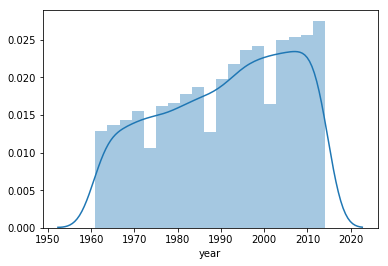

In [101]:
sns.distplot(df['year'])

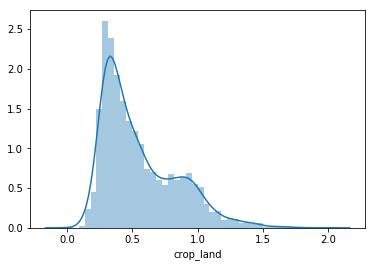

In [102]:
sns.distplot(df['crop_land'])

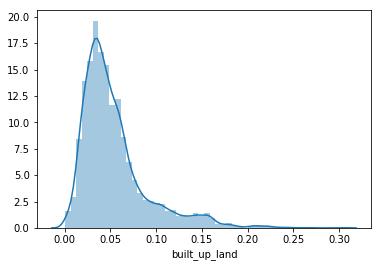

In [103]:
sns.distplot(df['built_up_land'])

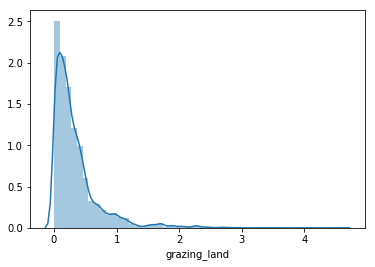

In [104]:
sns.distplot(df['grazing_land'])

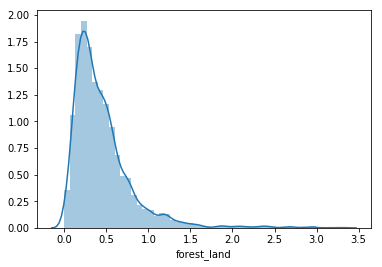

In [105]:
sns.distplot(df['forest_land'])

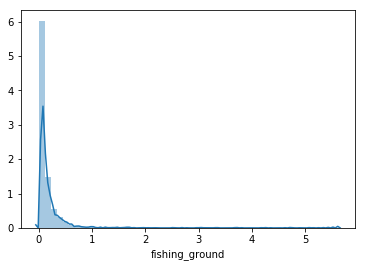

In [106]:
sns.distplot(df['fishing_ground'])

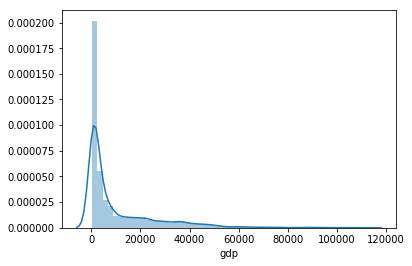

In [107]:
sns.distplot(df['gdp'])